Импорт зависимостей и установление сида для воспроизводимости результатов

In [1]:
import numpy as np
import scipy.stats

import json
from matplotlib import pyplot as plt


SIZE = 300
SEED = 7102025
generator = np.random.default_rng(seed=SEED)  # в версиях numpy 1.17 и выше рекомендуется использовать np.random.Generator для генерации случайных значений

## 1–2. Выборки и описательные статистики

Функция для вывода основных описательных статистик выборки

In [2]:
def get_stats(data: np.ndarray)->None:
    print("Mean: %.3f\nMedian: %.3f\nMode: %.3f\nVariance: %.3f\nSTD: %.3f" % 
          (
              data.mean(),  # вычисление среднего выборки
              np.median(data),  # вычисление медианы
              scipy.stats.mode(data).mode,  # вычисление моды
              data.var(ddof=1),  # вычисление дисперсии; для получения несмещенной оценки дисперсии используется параметр ddof
              data.std(ddof=1),  # вычисление стандартного отклонения
          )
    )

$$\overline{x} = \sum_{x \in X}x$$

$$\widetilde{\sigma} = \frac{\displaystyle \sum_{x \in X}(x - \overline{x})^2}{|X|}$$

$$\sigma = \frac{\displaystyle \sum_{x \in X}(x - \overline{x})^2}{|X| - 1}$$

$\sigma$ — несмещенная оценка дисперсии выборки, так как при $N \rightarrow \infty$ $\sigma \rightarrow D\xi$, где $D\xi$ — значение дисперсии случайной величины $\xi$, с помощью которой была получена выборка.

В следующих трех блоках моделируются выборки с предварительно заданными параметрами для каждого распределения: а) нормального, б) Пуассона, в) биномиального

In [3]:
MEAN = 2
STD = 1.41

data_normal = generator.normal(loc=MEAN, scale=STD, size=SIZE)
with open("data/lab1_normal.json", "w+") as f:
    json.dump(data_normal.tolist(), f)
get_stats(data_normal)

Mean: 1.889
Median: 1.830
Mode: -1.934
Variance: 2.026
STD: 1.423


In [4]:
LAMBDA = 12

data_poisson = generator.poisson(lam=LAMBDA, size=SIZE)
with open("data/lab1_poisson.json", "w+") as f:
    json.dump(data_poisson.tolist(), f)
get_stats(data_poisson)

Mean: 11.957
Median: 12.000
Mode: 11.000
Variance: 11.527
STD: 3.395


In [5]:
PROBABILITY = 0.618
N_TRIALS = 17

data_binomial = generator.binomial(p=PROBABILITY, n=N_TRIALS, size=SIZE)
with open("data/lab1_binomial.json", "w+") as f:
    json.dump(data_binomial.tolist(), f)
get_stats(data_binomial)

Mean: 10.470
Median: 10.000
Mode: 10.000
Variance: 4.230
STD: 2.057


## 3. Графики

Функция для построения двух гистограмм распределений. Интервал распределния определяется однозначно от размаха выборки и параметра $\verb|n_bins|$ функции $\verb|hist|$. Значение по умолчанию $10$ для первого графика подобрано по формуле Стерджиса: $$k = 1 + \log_2 N,$$
где $N$ — размер выборки, $k$ — количество интервалов разбиения. Значение $20$ было выбрано, как в два раза большее предыдущего для повышения количества деталей.

In [6]:
def plot_histograms(data: np.ndarray, title: str, bins1=10, bins2=20)->None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 8))

    axes[0].hist(data, bins=bins1, color="#75AB65", edgecolor="#000000")
    axes[0].set_xlabel("Values")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title(f"{title}\nn_bins={bins1}")

    axes[1].hist(data, bins=bins2, color="#F56A15", edgecolor="#000000")
    axes[1].set_xlabel("Values")
    axes[1].set_ylabel("Frequency")
    axes[1].set_title(f"{title}\nn_bins={bins2}")

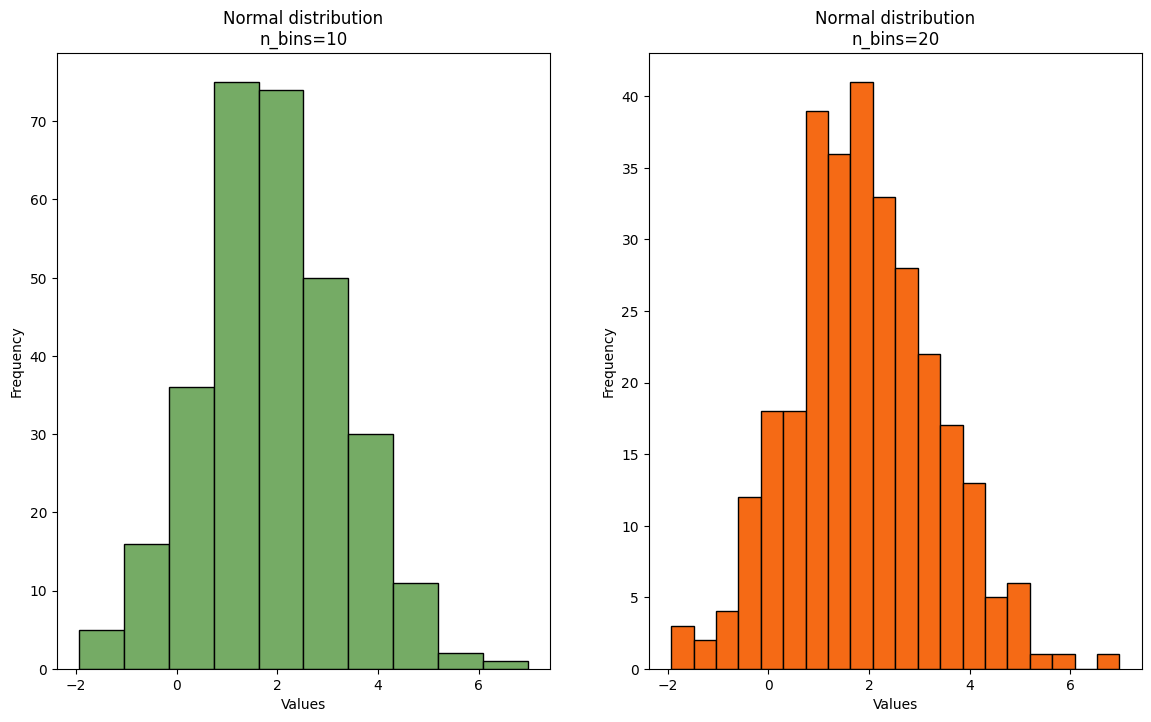

In [7]:
plot_histograms(data_normal, "Normal distribution")

В силу того, что распределение Пуассона и биномиальное распределение принимают целочисленные значения, было выбрано такое количсество интервалов, чтобы ограничить ширину столбца единицей. Число 10 в качестве ограничения количества столбцов выбрано по тем же соображениям, что и раньше.

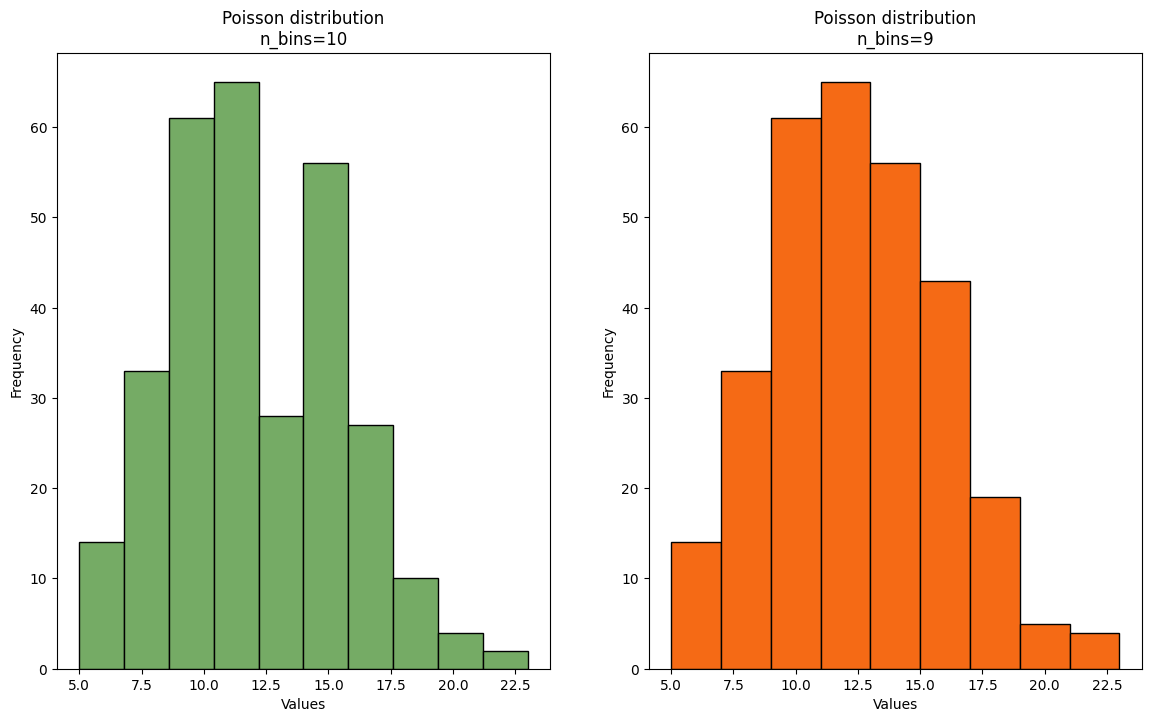

In [8]:
sample_size = data_poisson.max() - data_poisson.min()
plot_histograms(data_poisson, "Poisson distribution", bins1=min(10, sample_size+1), bins2=min(10, sample_size//2) if sample_size < 20 else 6)

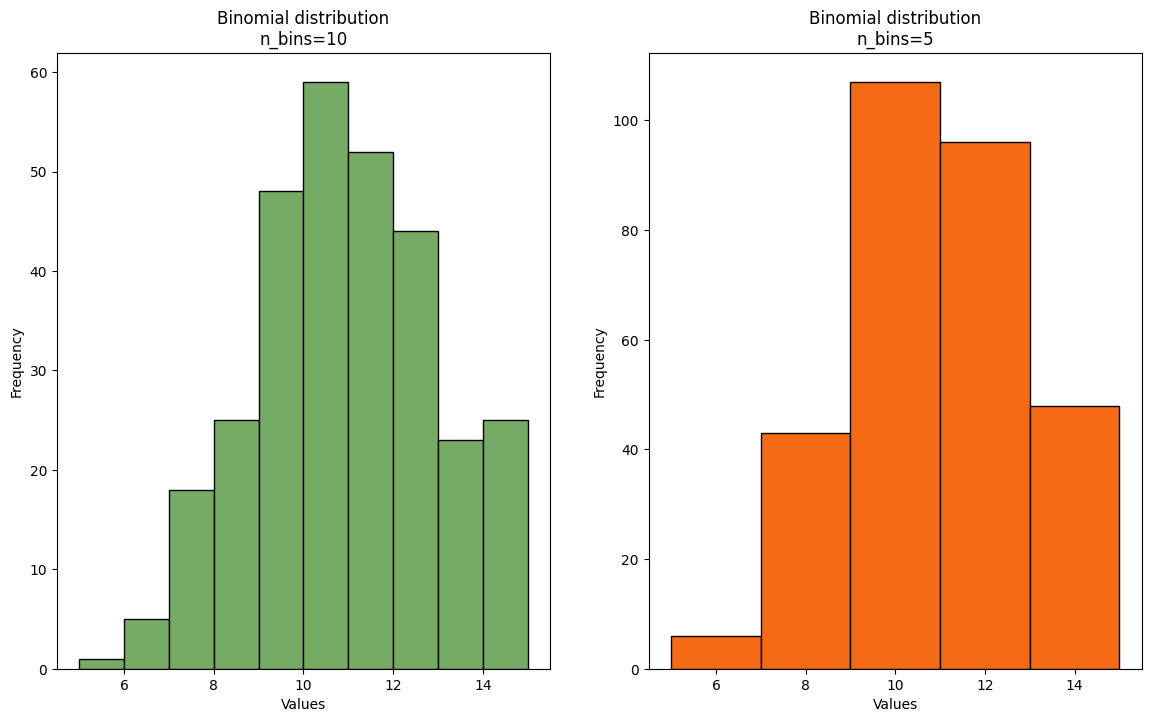

In [9]:
sample_size = data_binomial.max() - data_binomial.min()
plot_histograms(data_binomial, "Binomial distribution", bins1=min(10, sample_size+1), bins2=min(10, sample_size//2) if sample_size < 20 else 6)

## Выборки

In [10]:
data_normal

array([ 8.49595128e-01,  3.64112049e+00,  1.76704372e+00,  3.87293820e+00,
        2.22891551e+00,  1.89480282e+00,  2.82306283e+00,  3.44447217e+00,
       -3.47982162e-01,  2.21546986e+00,  3.22075162e+00, -1.31925500e+00,
        2.78153454e+00,  4.42966839e+00, -2.86896392e-01,  3.02387197e+00,
        3.17229857e-01,  2.39914262e+00,  1.62224732e+00,  1.57480975e+00,
        3.00224722e+00,  1.76939634e-03,  1.68501507e+00,  2.57570474e+00,
        4.64058225e-01,  2.80077022e+00,  7.13233557e-01,  2.97942859e+00,
        3.41072921e+00,  1.75821231e+00,  1.20653404e+00,  1.06357832e+00,
        1.92532238e+00,  2.57718360e+00,  2.45133865e+00,  3.74702928e+00,
        1.59472366e+00,  3.90482480e+00,  2.97243799e+00,  2.36114829e-01,
        7.57810243e-01,  1.58960186e+00,  1.43914664e+00,  5.84232991e+00,
        3.03893372e+00,  2.65972240e+00,  1.88284044e-01,  1.02397567e+00,
        1.53830030e+00,  1.98364369e+00,  1.06123976e+00,  3.35772304e+00,
        2.81391231e+00,  

In [11]:
data_poisson

array([15, 10,  8,  6,  8, 19, 12, 20, 18, 13, 12, 11, 15,  8, 22, 17,  9,
       15, 16, 14, 11,  9, 10, 14, 16, 18, 11, 11,  9, 19, 15, 14, 14, 15,
        8,  9, 10,  9, 12,  9,  9,  7, 10,  9,  9,  9, 10, 15,  7, 13, 14,
       12, 11, 13, 11,  9, 17, 14, 10,  8, 13, 18,  8, 18, 17, 17, 10, 16,
       17, 10,  6, 11, 11, 13,  8, 14, 16, 11, 14,  7, 10,  6,  7,  8, 13,
       12, 12, 13, 11, 16, 13, 13, 11, 10,  8, 12, 14, 12, 13, 14, 13, 16,
       12, 11, 11,  8, 18, 15,  9, 14, 12, 15, 21, 11,  8, 16,  9,  5, 11,
       11,  8, 14, 13, 12, 12, 10, 14, 14, 13, 10, 12, 10, 14,  9, 14, 15,
       15,  8, 12, 17,  5,  7,  8, 12, 14, 19,  9, 12, 14, 11,  6, 14, 14,
       16, 10, 12, 12, 15, 10,  9, 13, 15, 12, 10, 17, 13,  8, 10, 14, 16,
       10,  9, 12, 12, 11, 15,  9,  8, 11,  9, 23, 13,  9, 15, 11, 11,  7,
       12, 15, 11, 12, 10, 11, 10,  7,  8,  9, 11, 15, 13, 12,  7,  8,  8,
       11, 10, 11,  9, 14, 11, 16, 15, 14, 14, 10, 13, 15, 15, 10,  8, 13,
        8, 15, 15, 13, 15

In [12]:
data_binomial

array([12, 13,  8,  9, 10,  9, 14,  9, 10, 12,  6, 11, 10, 10,  8, 14,  9,
        7, 12, 11, 11,  8,  8, 11, 10,  9, 13,  9,  7, 11, 11,  9, 15,  9,
       13,  9, 12,  9, 14, 11, 10,  8, 10, 10,  9, 12, 10, 11, 10,  7, 11,
       12, 11, 12,  9, 11,  7,  8, 12,  6,  9, 10, 11, 11, 12, 10, 10, 12,
        8, 14, 13, 11, 13, 10,  9,  9, 10, 10, 11, 12, 10, 10,  9, 11, 14,
       11,  9, 14, 13, 11, 11, 11,  9, 13, 13, 11,  9, 13, 15, 14, 10, 11,
       10, 13, 10, 14, 13, 13, 12,  8,  9, 10, 12, 10,  8, 12,  7,  7, 13,
       12, 15, 10,  9,  5, 13,  7, 11, 12, 10, 11, 12, 11, 11,  9, 15, 12,
       12, 10, 15, 14,  8, 10,  7,  9, 11,  9, 12, 13, 12, 12, 13, 10, 12,
       14, 15, 10,  8,  6, 12, 11,  7,  9, 10, 13, 12, 12,  9, 10, 10, 10,
       10, 11,  9, 10,  8, 11,  8, 14, 10, 13, 11, 12,  8, 11, 12, 10, 11,
       14,  9, 11, 13, 11, 12, 10, 11, 10, 12, 15, 12,  8, 10,  8,  7, 10,
        9, 12,  9, 11,  9,  9,  7, 12, 10,  7,  8,  7,  6, 10,  7,  9, 14,
        8, 11, 12,  9,  8